In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [2]:
newsgroups_train = datasets.fetch_20newsgroups(subset='train', 
                                               categories=['comp.sys.mac.hardware', 'rec.motorcycles', 'sci.med', 'soc.religion.christian'])

In [3]:
tfidf_vectorizer = TfidfVectorizer(min_df=30)
X = tfidf_vectorizer.fit_transform(newsgroups_train.data)
y = newsgroups_train.target

In [4]:
pca = PCA(n_components=2)

In [5]:
X_reduced = pca.fit_transform(X.toarray())

In [6]:
print ('Original Shape: ', X.shape)
print ('Reduced Shape: ', X_reduced.shape)

('Original Shape: ', (2369, 1771))
('Reduced Shape: ', (2369, 2))


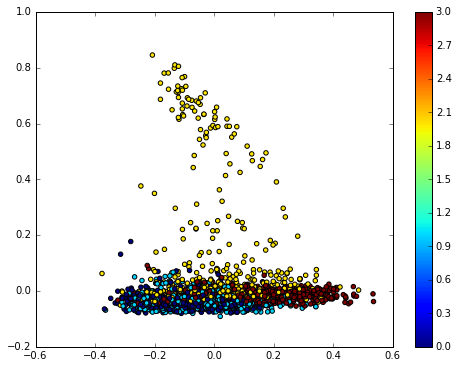

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = y)
plt.colorbar()

In [8]:
print ('Ratio of variance explained: ', pca.explained_variance_ratio_)

('Ratio of variance explained: ', array([ 0.03080441,  0.01712901]))


In [9]:
principal_components = pca.components_

In [10]:
principal_components.shape

(2, 1771)

In [11]:
principal_components[0]

array([ 0.00561855,  0.00206198,  0.00835439, ...,  0.00673148,
        0.00708003, -0.0090957 ])

In [17]:
invocab = dict([(vv,kk) for kk, vv in tfidf_vectorizer.vocabulary_.items()])
insens_idx = np.argsort(abs(principal_components[0]))

print ('Top 10 most activated words (loadings)')
for jj in insens_idx[-10:]:
    print '{} ({:0.6f})'.format(invocab[jj], principal_components[0,jj])
    
    
print ('\n Top 10 least activated words (loadings)')
for jj in insens_idx[:10]:
    print '{} ({:0.6f})'.format(invocab[jj], principal_components[0,jj])

Top 10 most activated words (loadings)
not (0.121831)
we (0.130983)
in (0.140311)
god (0.149258)
is (0.185458)
and (0.188487)
to (0.233587)
that (0.235554)
of (0.272942)
the (0.487690)

 Top 10 least activated words (loadings)
mentioned (0.000000)
40 (-0.000007)
company (0.000019)
pro (-0.000019)
onto (-0.000025)
wide (-0.000027)
wait (-0.000028)
moving (-0.000030)
reduce (0.000036)
guy (-0.000041)
